In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
data_train = pd.read_csv('Features.csv')

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data_train.Outlet_Size = data_train.Outlet_Size.fillna("Small")
data_train['Item_Weight'] = data_train['Item_Weight'].fillna((data_train['Item_Weight'].mean()))

In [6]:
data_train.isnull().sum().sum()

0

In [7]:
column_num = data_train.select_dtypes(exclude = ["object"]).columns
column_object = data_train.select_dtypes(include = ["object"]).columns

In [8]:
data_train_num = data_train[column_num]
data_train_object = data_train[column_object]

In [9]:
data_train_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data_train_object.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,5089,1232,935,4798,3350,5577


In [11]:
data_train_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [12]:
#Now we perform a few visualisations to understand the data better

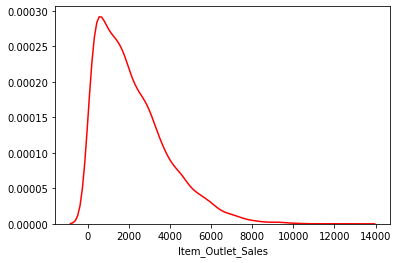

In [13]:
sns.distplot(data_train_num["Item_Outlet_Sales"], color='red', hist=False)

In [14]:
print("Skewness: %f" % data_train_num["Item_Outlet_Sales"].skew())
print("Kurtosis: %f" % data_train_num["Item_Outlet_Sales"].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


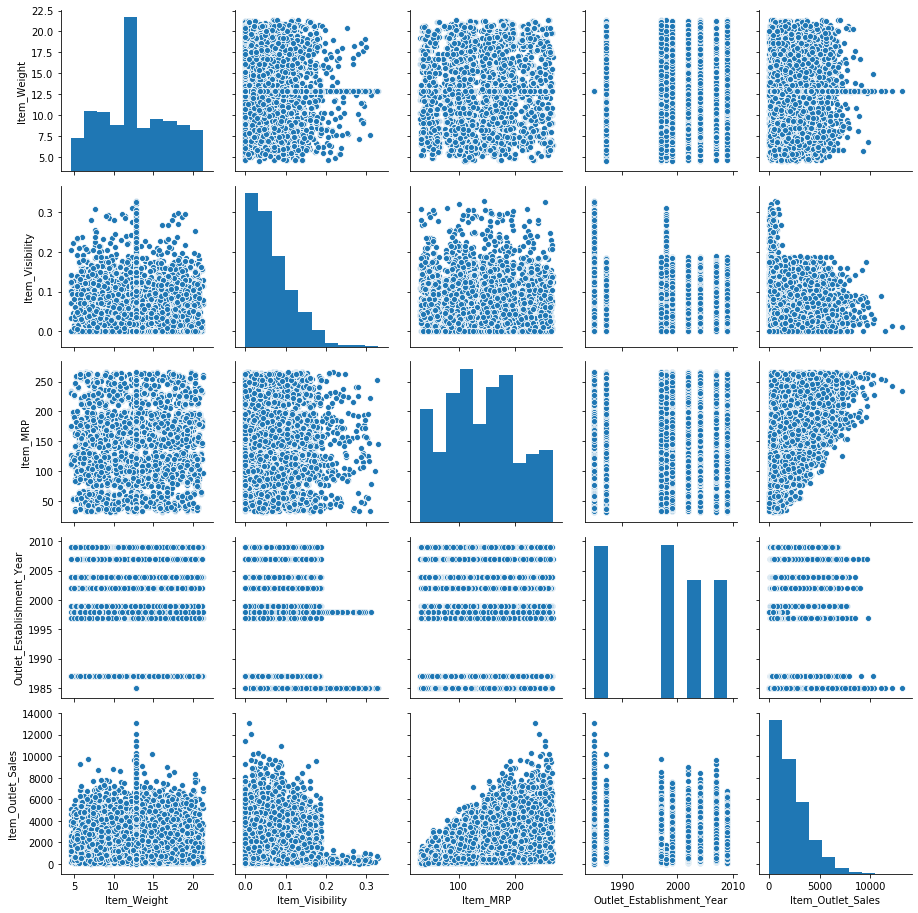

In [15]:
sns.pairplot(data_train_num)

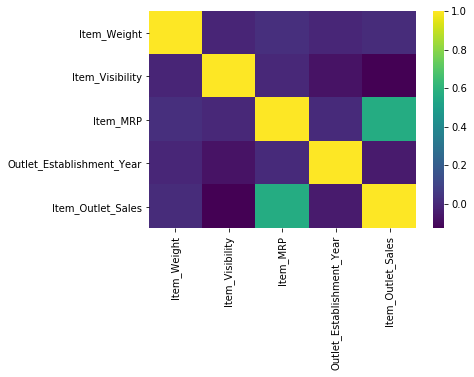

In [16]:
sns.heatmap(data_train_num.corr(), cmap='viridis')

In [17]:
data_train_object['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
val = {'reg':'Regular','LF':'Low Fat', 'low fat':'Low Fat'}
data_train_object['Item_Fat_Content'] = data_train_object['Item_Fat_Content'].map(val)
data_train_object['Item_Fat_Content'].value_counts()

C:\Users\Harshitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Low Fat    428
Regular    117
Name: Item_Fat_Content, dtype: int64

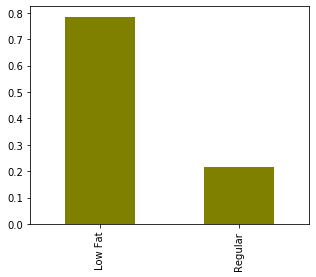

In [19]:
data_train_object['Item_Fat_Content'].value_counts(normalize=True).plot(figsize=(5,4),kind='bar',color='olive')

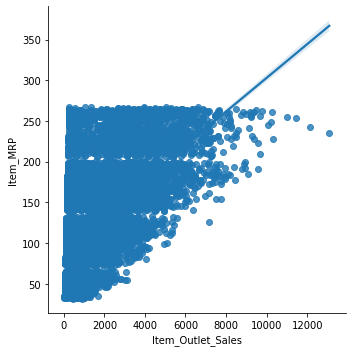

In [20]:
sns.lmplot(x='Item_Outlet_Sales', y='Item_MRP',data=data_train_num)

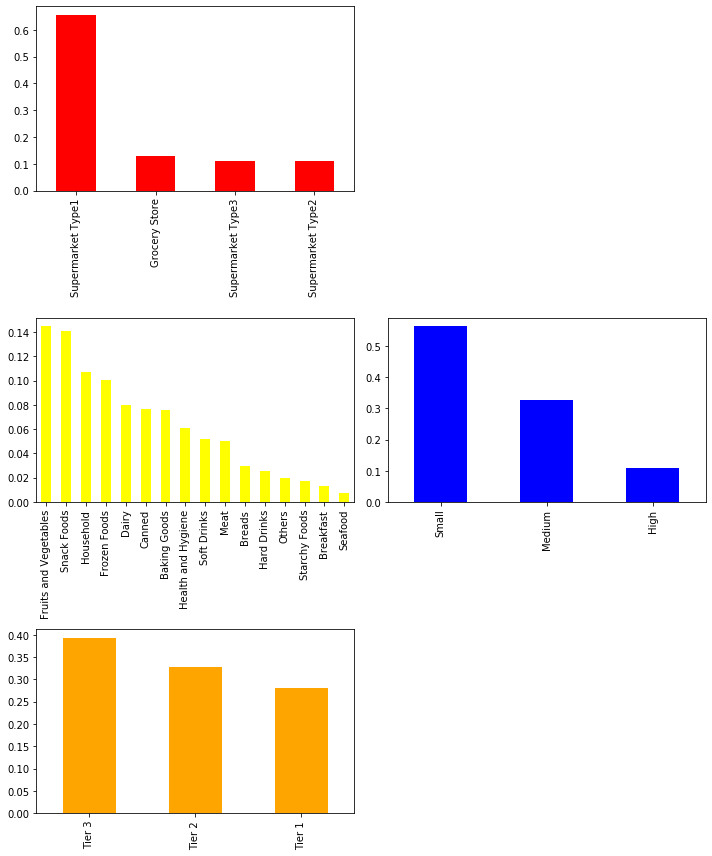

In [21]:
plt.figure(1)
plt.subplot(321)
data_train_object['Outlet_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='red')

plt.subplot(323)
data_train_object['Item_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='yellow')

plt.subplot(324)
data_train_object['Outlet_Size'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='blue')

plt.subplot(325)
data_train_object['Outlet_Location_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='orange')

plt.tight_layout()
plt.show()

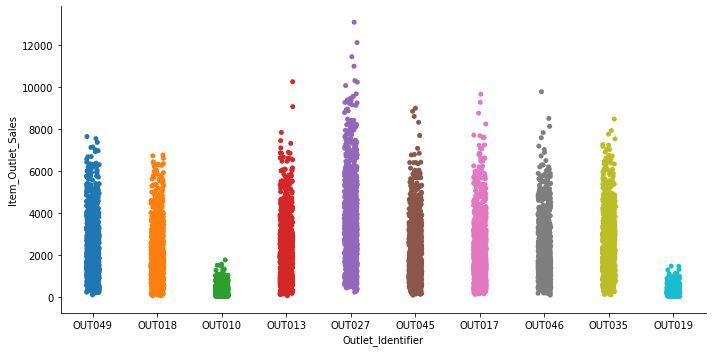

In [22]:
plotx = sns.catplot(x="Outlet_Identifier", y = "Item_Outlet_Sales", data=data_train, height=5, aspect=2)

In [23]:
train_object_lenght = len(data_train_object)
total_cat = pd.get_dummies(data_train_object, drop_first= True)
data_train_object = total_cat[:train_object_lenght]

In [24]:
data_train_object.head()

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [25]:
df_train = pd.concat([data_train_object,data_train_num],axis=1)
df_train.head()

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,9.30,0.016047,249.8092,1999,3735.1380
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,5.92,0.019278,48.2692,2009,443.4228
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,17.50,0.016760,141.6180,1999,2097.2700
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,19.20,0.000000,182.0950,1998,732.3800
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,8.93,0.000000,53.8614,1987,994.7052


In [26]:
train_Y = df_train.iloc[:,-1]
train_X=  df_train.iloc[:,0:-1]

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaler = scaler.fit(train_X)
train_scale = train_scaler.transform(train_X)
train_X = pd.DataFrame(train_scale, columns=train_X.columns)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [29]:
X1_train, X1_test, Y1_train,Y1_test =  train_test_split(train_X, train_Y, test_size = 0.2)

In [30]:
pca_model = PCA(n_components=0.95)
X1_train = pca_model.fit_transform(X1_train)
X1_test = pca_model.transform(X1_test)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)

(6818, 1419)
(1705, 1419)
(6818,)


In [43]:
from math import *
from sklearn.metrics import mean_squared_error
def modelPredection(model,X1_train,Y1_train,X1_test,Y1_test) :
    model.fit(X1_train,Y1_train)
    Y1_predict = model.predict(X1_test)
    print("RMSE : %f"%sqrt(mean_squared_error(Y1_test,Y1_predict)))
    

In [44]:
#Linear Regression
from sklearn import linear_model
linear = linear_model.LinearRegression( fit_intercept=True, n_jobs=None, normalize=False);
predict1_Y = modelPredection(linear,X1_train,Y1_train,X1_test,Y1_test)

RMSE : 1365.157887


In [45]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =16, random_state=100)
predict2_Y = modelPredection(lasso,X1_train,Y1_train,X1_test,Y1_test)

RMSE : 1287.426210


In [46]:
#XGBoost
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
predict3_Y = modelPredection(model_xgb,X1_train,Y1_train,X1_test,Y1_test)

RMSE : 1276.355196


In [35]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor as rfr
regressor = rfr(n_estimators = 10, random_state = 0)
predict4_Y = modelPredection(regressor,X1_train,Y1_train,X1_test,Y1_test)

RMSE : 1332.699190


In [47]:
errors=[1365.157887, 1287.426210, 1276.355176 ,1332.699190 ]

col={'RMSE':errors}
models=['Linear Regression','Lasso Regression','XGBoost Regression','Random Forest Regression']
df=pd.DataFrame(data=col,index=models)
df

,RMSE
Linear Regression,1365.157887
Lasso Regression,1287.426210
XGBoost Regression,1276.355176
Random Forest Regression,1332.699190
